# Loan Approval Prediction

### Importing Libraries and Dataset

- Pandas: To load the Dataframe
- Matplotlib: To visualize the data features
- Seaborn: To see the correlation between features using heatmap

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

data = pd.read_csv('LoanApprovalPrediction.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


### Data Preprocessing and Visualization

Get the number of columns of object datatype.

In [3]:
obj = (data.dtypes == 'object')
print('Categorical variables:', len(list(obj[obj].index)))

Categorical variables: 7


As Loan_ID is completely unique and not correlated with any of the other column, We can drop it

In [4]:
# Dropping Loan_ID column
data.drop(['Loan_ID'], axis=1, inplace=True)

Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

/home/kishore/anaconda3/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/kishore/anaconda3/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/kishore/anaconda3/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/kishore/anaconda3/envs/practice/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarra

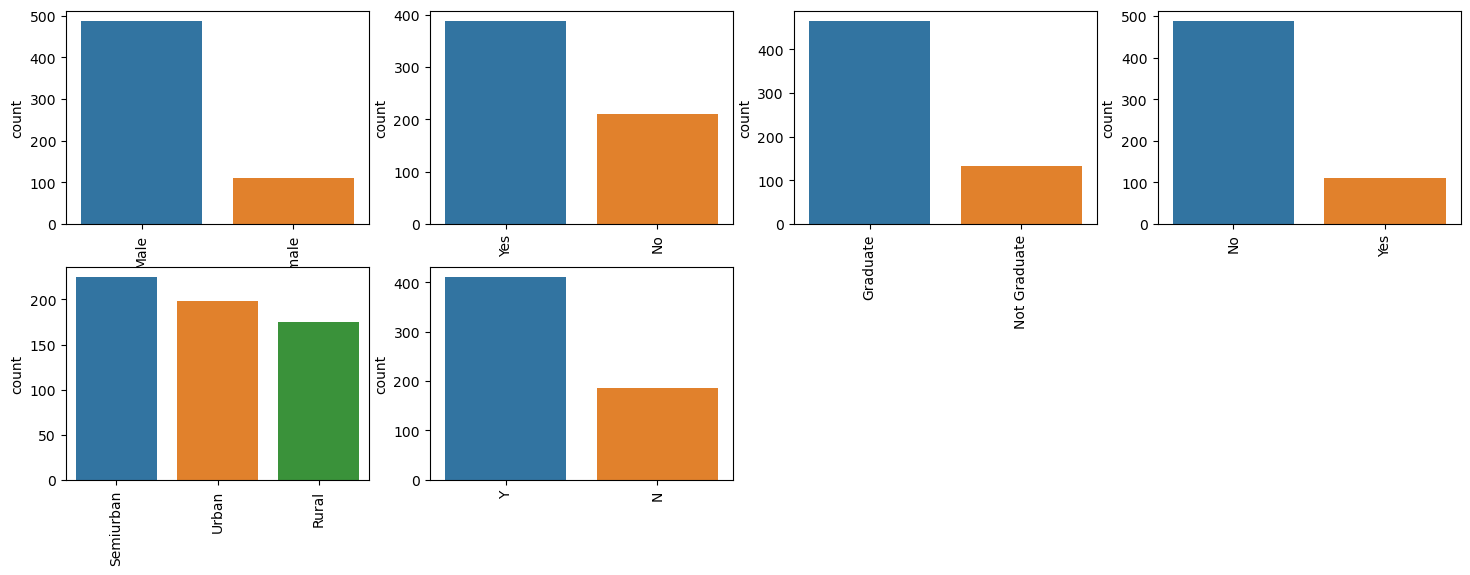

In [6]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y)
  index +=1

As all the categorical values are binary, so we can use Label Encoder for all such columns and the values will change into **int** datatype.

In [9]:
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

obj = (data.dtypes == 'object')
print('Categorical variables:', len(list(obj[obj].index)))

Categorical variables: 0


Generate a Heatmap

<Axes: >

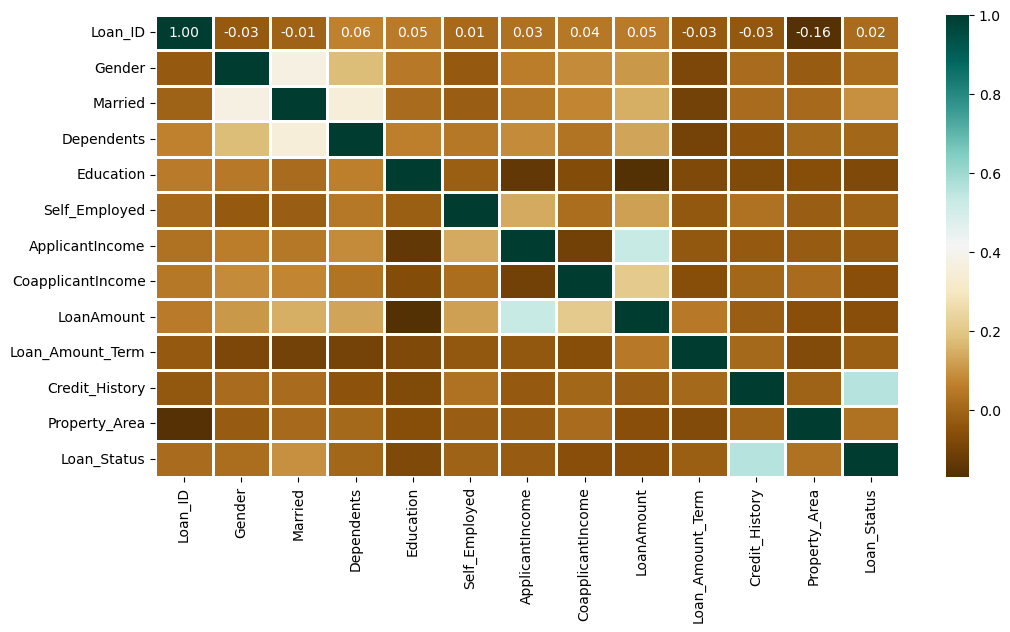

In [11]:
plt.figure(figsize=(12, 6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

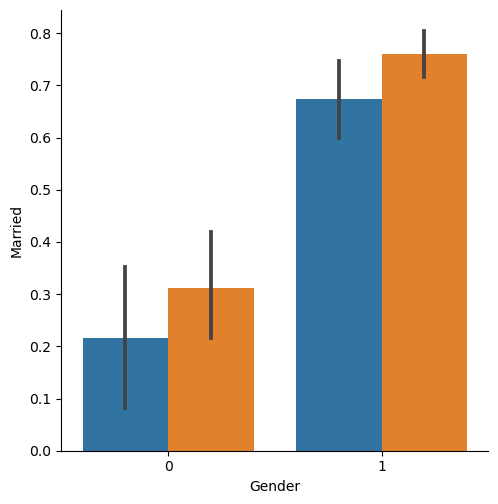

In [12]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status",  kind="bar",  
            data=data)

Find out if there is any missing values in the dataset 

In [13]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Splitting Dataset

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
print(X.shape,Y.shape) 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(598, 12) (598,)


((358, 12), (240, 12), (358,), (240,))

### Model Training and Evaluation

As this is a classification problem, so we will be using these models
:

- KNeighborsClassifiers
- RandomForestClassifiers
- Support Vector Classifiers
- Logistic Regression

In [17]:
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 76.25698324022346
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.3296089385475


/home/kishore/anaconda3/envs/practice/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Making predictions on the test set

### Conclusion
RandomForestClassifier is giving the best accuracy with an accuracy score of 98% for the testing dataset.